<h2 style="color: pink">❓The main question:</h2>
What are the most common factors (e.g., genre, director, star power, and IMDb rating) that correlate with a movie's box office gross, and how can we leverage this information for future productions?

Purpose: This question helps identify which elements (such as genre, star cast, director, or even IMDb rating) contribute the most to a movie's financial success. Understanding these correlations allows the studio to strategically select projects with higher likelihoods of financial success by matching successful patterns from past movies.

Impact: By identifying the factors that lead to high box office earnings, the studio can focus on producing movies with similar characteristics, increasing the chances of commercial success.

<h3 style="color: pink">Include necessary libraries</h3>

---

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
HOME = os.getcwd()
print('HOME: ', HOME)

DATASET = os.path.join(HOME, r'data\imdb_top_1000.csv')
print('DATASET: ', DATASET)

HOME:  d:\Data Science Programming\External_Projects\Top 1000 IMDB Dataset
DATASET:  d:\Data Science Programming\External_Projects\Top 1000 IMDB Dataset\data\imdb_top_1000.csv


<h3 style="color: pink">Load and Understand Data</h3>

---

In [3]:
df = pd.read_csv(DATASET)
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [4]:
df = df[['Genre', 'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']]

Check the number of rows and columns

In [5]:
df.shape

(1000, 10)

Check dataset's attributes

In [6]:
df.keys()

Index(['Genre', 'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

Check columns types

In [7]:
df.dtypes

Genre           object
IMDB_Rating    float64
Meta_score     float64
Director        object
Star1           object
Star2           object
Star3           object
Star4           object
No_of_Votes      int64
Gross           object
dtype: object

Check empty value in columns

In [8]:
df.isnull().sum()

Genre            0
IMDB_Rating      0
Meta_score     157
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross          169
dtype: int64

<h3 style="color: pink">Data Preprocessing</h3>

---

For missed `Meta_score` values, I will fill it with **mean**

In [9]:
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())
df

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_15872\3742973292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())


,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...
995,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


For missed `Gross` value handling, I will drop it

In [10]:
df = df.dropna(subset=['Gross'])
df

,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...
990,"Drama, War, Western",7.6,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690"
991,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
992,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
994,"Comedy, Music, Musical",7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"


<h3 style="color: pink">Feature Engineering</h3>

---

For `Genre` columns, I use **Categorical Encoding** techniques like **One-Hot Encoding** to handle

In [11]:
df['Genre'] = df['Genre'].str.split(', ')
encode_genres_df = df['Genre'].explode().str.get_dummies().groupby(level=0).sum()
df = pd.concat([df, encode_genres_df], axis=1)
df

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_15872\959577553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre'] = df['Genre'].str.split(', ')


,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,[Drama],9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",...,0,0,0,0,0,0,0,0,0,0
1,"[Crime, Drama]",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",...,0,0,0,0,0,0,0,0,0,0
2,"[Action, Crime, Drama]",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",...,0,0,0,0,0,0,0,0,0,0
3,"[Crime, Drama]",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",...,0,0,0,0,0,0,0,0,0,0
4,"[Crime, Drama]",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,"[Drama, War, Western]",7.6,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690",...,0,0,0,0,0,0,0,0,1,1
991,"[Adventure, Comedy, War]",7.6,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435",...,0,0,0,0,0,0,0,0,1,0
992,"[Animation, Adventure, Family]",7.6,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612",...,0,0,0,0,0,0,0,0,0,0
994,"[Comedy, Music, Musical]",7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024",...,0,1,1,0,0,0,0,0,0,0


After encoding, drop `Genre` column

In [12]:
df.drop(columns=['Genre'], inplace=True)
df

,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Action,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",0,...,0,0,0,0,0,0,0,0,0,0
1,9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",0,...,0,0,0,0,0,0,0,0,0,0
2,9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",1,...,0,0,0,0,0,0,0,0,0,0
3,9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",0,...,0,0,0,0,0,0,0,0,0,0
4,9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,7.6,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690",0,...,0,0,0,0,0,0,0,0,1,1
991,7.6,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435",0,...,0,0,0,0,0,0,0,0,1,0
992,7.6,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612",0,...,0,0,0,0,0,0,0,0,0,0
994,7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024",0,...,0,1,1,0,0,0,0,0,0,0


For Director, to capture the popularity of a director based on their past projects, I use **frequency encoding** techniques

In [13]:
df['Director frequency'] = df['Director'].map(df['Director'].value_counts(normalize=True))
df.drop(columns=['Director'], inplace=True)
df

,IMDB_Rating,Meta_score,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Action,Adventure,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Director frequency
0,9.3,80.0,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",0,0,...,0,0,0,0,0,0,0,0,0,0.002407
1,9.2,100.0,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",0,0,...,0,0,0,0,0,0,0,0,0,0.006017
2,9.0,84.0,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",1,0,...,0,0,0,0,0,0,0,0,0,0.009627
3,9.0,90.0,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",0,0,...,0,0,0,0,0,0,0,0,0,0.006017
4,9.0,96.0,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",0,0,...,0,0,0,0,0,0,0,0,0,0.004813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,7.6,77.0,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690",0,0,...,0,0,0,0,0,0,0,1,1,0.007220
991,7.6,50.0,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435",0,1,...,0,0,0,0,0,0,0,1,0,0.001203
992,7.6,65.0,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612",0,1,...,0,0,0,0,0,0,0,0,0,0.001203
994,7.6,96.0,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024",0,0,...,1,1,0,0,0,0,0,0,0,0.001203


For `Star` columns, to capture the popularity of a director based on their past projects, I will calculate `Star_Power` metric (sum of occurrences of all stars in the dataset)

In [14]:
# Frequency Encoding for Stars
for star in ['Star1', 'Star2', 'Star3', 'Star4']:
    df[star] = df[star].fillna('Unknown')  # Handle missing values
    df[f'{star}_Frequency'] = df[star].map(df[star].value_counts(normalize=True))

# Aggregate the star frequencies into a single 'Star_Power' metric
df['Star_Power'] = df[['Star1_Frequency', 'Star2_Frequency', 'Star3_Frequency', 'Star4_Frequency']].sum(axis=1)

# Drop individual frequency columns if not needed
df = df.drop(columns=['Star1_Frequency', 'Star2_Frequency', 'Star3_Frequency', 'Star4_Frequency', 'Star1', 'Star2', 'Star3', 'Star4'])
df


,IMDB_Rating,Meta_score,No_of_Votes,Gross,Action,Adventure,Animation,Biography,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Director frequency,Star_Power
0,9.3,80.0,2343110,"28,341,469",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.002407,0.004813
1,9.2,100.0,1620367,"134,966,411",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.006017,0.009627
2,9.0,84.0,2303232,"534,858,444",1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.009627,0.018051
3,9.0,90.0,1129952,"57,300,000",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.006017,0.020457
4,9.0,96.0,689845,"4,360,000",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.004813,0.007220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,7.6,77.0,30144,"696,690",0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0.007220,0.004813
991,7.6,50.0,45338,"1,378,435",0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0.001203,0.016847
992,7.6,65.0,166409,"141,843,612",0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0.001203,0.004813
994,7.6,96.0,40351,"13,780,024",0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0.001203,0.004813


Modified `Gross` column

In [15]:
df['Gross'] = df['Gross'].str.replace(',', '').astype(int)
df.dtypes

IMDB_Rating           float64
Meta_score            float64
No_of_Votes             int64
Gross                   int64
Action                  int64
Adventure               int64
Animation               int64
Biography               int64
Comedy                  int64
Crime                   int64
Drama                   int64
Family                  int64
Fantasy                 int64
Film-Noir               int64
History                 int64
Horror                  int64
Music                   int64
Musical                 int64
Mystery                 int64
Romance                 int64
Sci-Fi                  int64
Sport                   int64
Thriller                int64
War                     int64
Western                 int64
Director frequency    float64
Star_Power            float64
dtype: object

Normalize numeric columns

In [16]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[['IMDB_Rating', 'Meta_score', 'Gross', 'No_of_Votes']])
scaled_df = pd.DataFrame(scaled_values, columns=['scaled_IMDB_Rating', 'scaled_Meta_score', 'scaled_Gross', 'scaled_No_of_Votes'])
scaled_df

,scaled_IMDB_Rating,scaled_Meta_score,scaled_Gross,scaled_No_of_Votes
0,4.780597,0.209917,-0.361888,5.904597
1,4.427282,1.895902,0.610223,3.800159
2,3.720651,0.547114,4.256079,5.788483
3,3.720651,1.052909,-0.097870,2.372199
4,3.720651,1.558705,-0.580529,1.090723
...,...,...,...,...
826,-1.225761,-0.042981,-0.613928,-0.830154
827,-1.225761,-2.319061,-0.607712,-0.785913
828,-1.225761,-1.054572,0.672923,-0.433386
829,-1.225761,1.558705,-0.494646,-0.800433


In [17]:
scaled_df = pd.concat([df.drop(columns=['IMDB_Rating', 'Meta_score', 'Gross', 'No_of_Votes']).reset_index(drop=True), scaled_df.reset_index(drop=True)], axis=1)
scaled_df


,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Sport,Thriller,War,Western,Director frequency,Star_Power,scaled_IMDB_Rating,scaled_Meta_score,scaled_Gross,scaled_No_of_Votes
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0.002407,0.004813,4.780597,0.209917,-0.361888,5.904597
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0.006017,0.009627,4.427282,1.895902,0.610223,3.800159
2,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0.009627,0.018051,3.720651,0.547114,4.256079,5.788483
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0.006017,0.020457,3.720651,1.052909,-0.097870,2.372199
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0.004813,0.007220,3.720651,1.558705,-0.580529,1.090723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0.007220,0.004813,-1.225761,-0.042981,-0.613928,-0.830154
827,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0.001203,0.016847,-1.225761,-2.319061,-0.607712,-0.785913
828,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0.001203,0.004813,-1.225761,-1.054572,0.672923,-0.433386
829,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0.001203,0.004813,-1.225761,1.558705,-0.494646,-0.800433


In [18]:
scaled_df.keys()

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'Director frequency', 'Star_Power', 'scaled_IMDB_Rating',
       'scaled_Meta_score', 'scaled_Gross', 'scaled_No_of_Votes'],
      dtype='object')

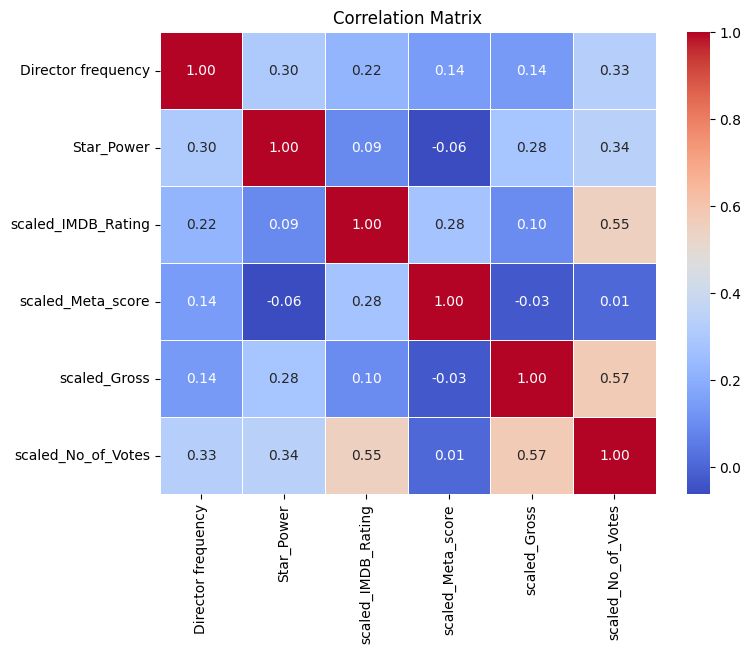

In [19]:
corr_matrix = scaled_df[['Director frequency', 'Star_Power', 'scaled_IMDB_Rating', 'scaled_Meta_score', 'scaled_Gross', 'scaled_No_of_Votes']].corr()

# Step 2: Plot the heatmap using seaborn
plt.figure(figsize=(8, 6))  # Optional: set the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Step 3: Show the plot
plt.title('Correlation Matrix')
plt.show()

In [20]:
X = scaled_df.drop(columns=['scaled_Gross'])
y = scaled_df['scaled_Gross']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Initialize linear regression model
lr = LinearRegression()

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=lr, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Access the fitted model used by RFE (after fitting the model)
fitted_model = rfe.estimator_

# Get the importance scores (coefficients from the Linear Regression model used by RFE)
importance_scores = fitted_model.coef_

# Create a DataFrame with feature names and their importance scores, but only for selected features
selected_features = X.columns[rfe.support_]

# Create a DataFrame with feature names and their importance scores
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importance_scores
})

# Sort the selected features by importance score (absolute value of coefficients)
feature_importance['Importance'] = feature_importance['Importance'].abs()  # Use absolute value
selected_features_sorted = feature_importance.sort_values(by='Importance', ascending=False)

print("Selected Features Sorted by Importance:\n", selected_features_sorted)

Selected Features Sorted by Importance:
               Feature  Importance
7          Star_Power   21.692235
6  Director frequency    4.612482
9  scaled_No_of_Votes    0.578154
1           Adventure    0.561553
0              Action    0.328919
2           Animation    0.295688
8  scaled_IMDB_Rating    0.254645
5               Music    0.209098
3               Crime    0.208351
4              Family    0.208287
